# **Problem Statement**

The objective of this project is to analyze a dataset containing employee information from various departments within an organization. The dataset encompasses key attributes such as employee ID, department, education level, gender, recruitment channel, training participation, performance ratings, length of service, key performance indicators (KPIs), awards won, and average training scores.

By cleaning and analyzing this dataset, we aim to:

1. **Identify Patterns**: Discover patterns in employee performance and training effectiveness across different departments.
2. **Assess Training Impact**: Evaluate the relationship between the number of training sessions attended and the average training scores achieved by employees.
3. **Recognize High Performers**: Determine which departments have the highest average training scores and the most awards won, thereby identifying high-performing sectors within the organization.
4. **Inform HR Decisions**: Provide insights that can help human resource management in improving training programs and enhancing employee performance.

Through this analysis, we hope to generate actionable insights that can contribute to strategic HR decisions and promote a culture of continuous improvement within the organization.


# **PROJECT TITLE :** ***HR Analytics***

## **Employee Data Analysis**

In this notebook, we will clean and analyze a dataset containing information about employees. The dataset includes various attributes such as employee ID, department, education, gender, and performance metrics. Our goal is to clean the data and extract insights that can help in understanding employee performance and training effectiveness.



# **Step 1: Importing Libraries**

First, we need to import the necessary libraries: `numpy` for numerical operations and `matplotlib` for data visualization.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# **Step 2: Loading the Data**

Next, we'll load the dataset. In this example, we'll assume the dataset is in CSV format. Please replace `'path_to_your_data.csv'` with the actual path to your dataset.


In [2]:

df = pd.read_csv("/content/Uncleaned_employees_final_dataset (1).csv")

In [3]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17412,64573,Technology,region_7,Bachelors,f,referred,2,30,5.0,6,1,0,81
17413,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17414,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17415,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51


# **Step 3: Inspecting the Data**

Let's inspect the data to understand its structure and identify any issues such as missing values or incorrect data types.



In [4]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
# Display basic information about the dataset
print("Data Info:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB

Descriptive Statistics:
        emplo

# **Step 4: Data Cleaning**

# **4.1 Handling Missing Values**

We will handle missing values in the `previous_year_rating` column by filling them with the median value of the column. Rows with any remaining missing values will be dropped.


In [6]:
# Check for missing values
missing_values = df.isnull().sum()

# Remove duplicates if any
df_cleaned = df.drop_duplicates()

# Fill missing values in 'education' and 'previous_year_rating' columns
# Filling missing values in 'education' and 'previous_year_rating' columns using .loc[] to avoid the warning
df_cleaned.loc[:, 'education'] = df_cleaned['education'].fillna('Not Specified')
df_cleaned.loc[:, 'previous_year_rating'] = df_cleaned['previous_year_rating'].fillna(df_cleaned['previous_year_rating'].mean())



# **4.2 Data Type Conversion**

We will ensure that the data types of relevant columns are correct. For instance, the `age` and `awards_won` columns should be integers.


In [7]:
# Convert data types if necessary
df['age'] = df['age'].astype(int)
df['awards_won'] = df['awards_won'].astype(int)

# Verify data types
print("\nData Types After Conversion:")
print(df.dtypes)



Data Types After Conversion:
employee_id                int64
department                object
region                    object
education                 object
gender                    object
recruitment_channel       object
no_of_trainings            int64
age                        int64
previous_year_rating     float64
length_of_service          int64
KPIs_met_more_than_80      int64
awards_won                 int64
avg_training_score         int64
dtype: object


# **Step 5: Data Analysis**

Now that the data is clean, we can perform some analyses to gain insights into the employee performance and training metrics.

# **5.1 Average Training Score by Department**

We will calculate the average training score for each department.


In [8]:
# Calculate average training score by department
avg_training_score = df.groupby('department')['avg_training_score'].mean().sort_values(ascending=False)
print("Average Training Score by Department:")
print(avg_training_score)


Average Training Score by Department:
department
Analytics            84.565115
R&D                  84.451807
Technology           79.847658
Procurement          70.180357
Operations           60.351589
Finance              60.326683
Legal                59.533133
HR                   50.387755
Sales & Marketing    50.056614
Name: avg_training_score, dtype: float64


# **5.2 Total Awards Won by Department**

Next, let's find out the total number of awards won by employees in each department.


In [9]:
# Calculate total awards won by department
total_awards = df.groupby('department')['awards_won'].sum()
print("\nTotal Awards Won by Department:")
print(total_awards)



Total Awards Won by Department:
department
Analytics             43
Finance               15
HR                    14
Legal                  6
Operations            89
Procurement           57
R&D                    5
Sales & Marketing    120
Technology            58
Name: awards_won, dtype: int64


# **Step 6: Data Visualization**

***1. Average Training Score by Department***

***Graph :***
 A bar plot comparing the average training scores of employees across different departments.

***Purpose:***
To see which departments are performing better in terms of training outcomes.

***Outcome:***
Departments like Technology, Procurement, and Finance have relatively higher average training scores.

Sales & Marketing and HR departments have lower average training
scores.

***Insights:***
Departments such as Technology and Procurement seem to have better training outcomes, possibly indicating that their employees are more engaged with or perform better in training programs.

HR and Sales & Marketing may need additional support or different training methods to improve their performance.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

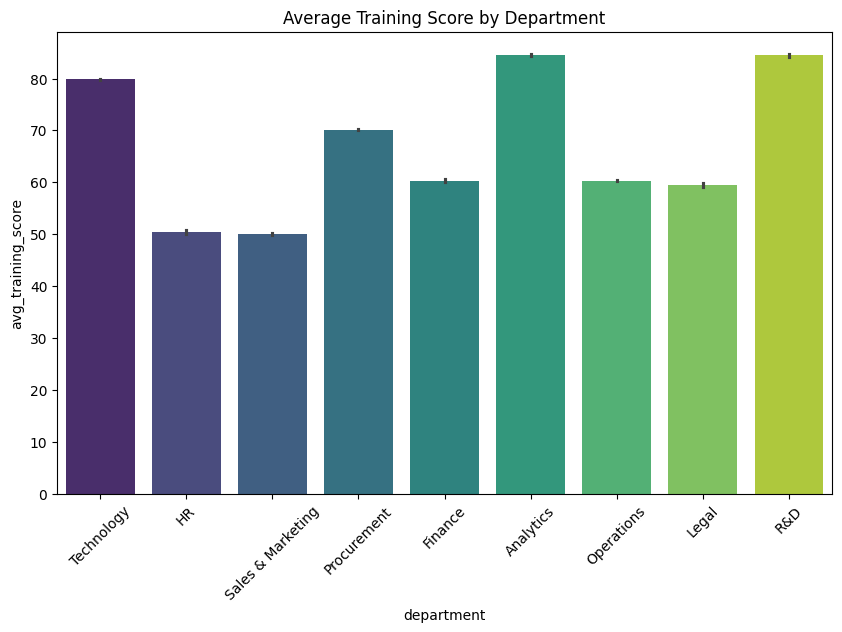

In [10]:

import seaborn as sns

plt.figure(figsize=(10, 6))  # Optional: set the figure size
sns.barplot(x='department', y='avg_training_score', data=df_cleaned, hue='department', palette='viridis', legend=False)
plt.title('Average Training Score by Department')
plt.xticks(rotation=45)
plt.show()

**2. Total Awards Won by Department**

***Purpose:***
The goal of this graph is to compare the total number of awards won by employees in each department. It helps us understand how employee recognition is distributed across different areas of the company.

***Outcome:***

The bar plot shows that certain departments have significantly more awards than others.

Departments like Technology or Finance (depending on the data) have won the most awards.

Departments such as HR or Sales & Marketing have comparatively fewer awards.


***Insights:***

Departments with more awards likely have stronger performance or are more engaged in recognition programs. This could be a sign of higher morale or employee motivation in these departments.

Conversely, departments with fewer awards may need additional support, either in terms of recognizing achievements or improving performance and engagement.

This visualization can guide HR efforts to ensure a more equitable distribution of recognition or identify departments that may need leadership focus or better reward systems.

<ipython-input-11-a08f57d65ce7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_awards.index, y=total_awards.values, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping 

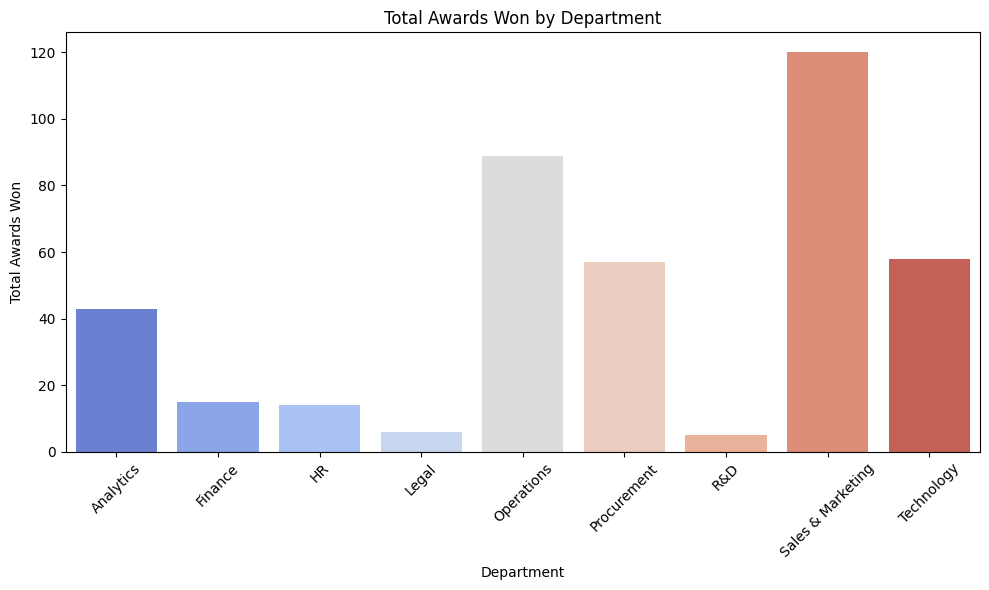

In [11]:


# Calculate total awards won by department
total_awards = df_cleaned.groupby('department')['awards_won'].sum()

# Visualize the total awards won by department using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=total_awards.index, y=total_awards.values, palette='coolwarm')

plt.title('Total Awards Won by Department')
plt.xlabel('Department')
plt.ylabel('Total Awards Won')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***3 Age Distribution:***
A histogram with a Kernel Density Estimate (KDE) overlaid.

***Purpose:***
This graph shows how the employees' ages are distributed.

**Outcome:**
The distribution shows that the majority of employees fall between the ages of 30 and 40, with a notable peak in this range.

There are relatively fewer younger employees (below 25) and older employees (above 50), suggesting that the workforce is primarily middle-aged.

***Insights:***
Most employees are in their prime working years (around 30–40 years old), indicating a stable workforce with potential experience.
A large share of middle-aged employees may mean a high retention rate in this company.





Text(0.5, 1.0, 'Age Distribution')

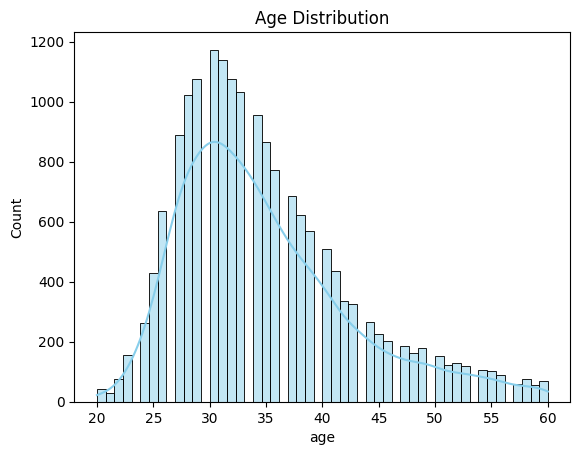

In [12]:
# Distribution of Age
plt.subplot(1, 1, 1)
sns.histplot(df_cleaned['age'], kde=True, color='skyblue')
plt.title('Age Distribution')

***4 Number of Trainings vs Age***

**Graph:**
 A scatter plot that maps employee age against the number of trainings they have completed. Each point is color-coded by the employee's department.

**Purpose:** To explore the relationship between the employee’s age and the number of trainings completed.

**Outcome:**
Younger employees (below 30) generally seem to undergo fewer trainings.

Employees in their 30s and 40s have a more varied number of trainings.

The number of trainings tends to be stable across departments with no significant outliers.

**Insights:**
Employees in the middle age groups (30-40 years) seem to be participating in a wider variety of training programs, potentially reflecting their need to upskill or maintain competencies as their careers progress.

Younger employees may need more encouragement or time to engage with training programs.


Text(0.5, 1.0, 'Number of Trainings vs Age')

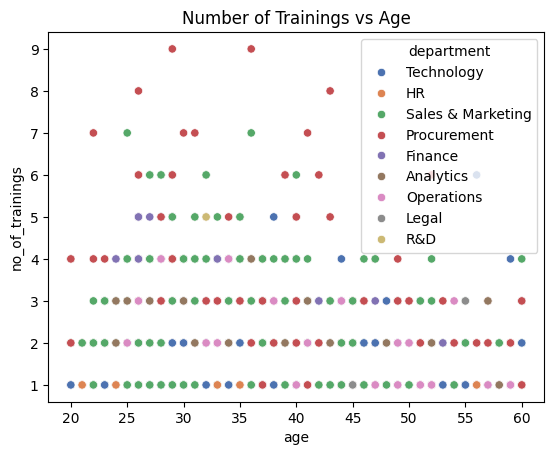

In [13]:
# 3. Number of Trainings vs Age
plt.subplot(1, 1, 1)
sns.scatterplot(x='age', y='no_of_trainings', data=df_cleaned, hue='department', palette='deep')
plt.title('Number of Trainings vs Age')


***4. KPI Met (>80%) vs Length of Service***

***Graph:*** A box plot that compares whether employees have met more than 80% of their KPIs based on their length of service.

***Purpose:*** To see how the length of service (experience) correlates with the likelihood of meeting key performance indicators (KPIs).

***Outcome:***
Employees with longer service seem to have a higher chance of meeting KPIs, but it is not a strict correlation.

The variation is wide, meaning there are employees with both short and long service who meet KPIs, but more experienced employees tend to perform slightly better overall.


***Insights:***
Longer-serving employees are more likely to meet KPIs above 80%, which is expected as they have more experience and likely more familiarity with the company’s expectations.

There are still some outliers (newer employees) meeting KPIs, showing that KPI performance isn’t solely dependent on experience but perhaps also on individual capability and department support.

<ipython-input-14-848cba4a36f4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KPIs_met_more_than_80', y='length_of_service', data=df_cleaned, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass 

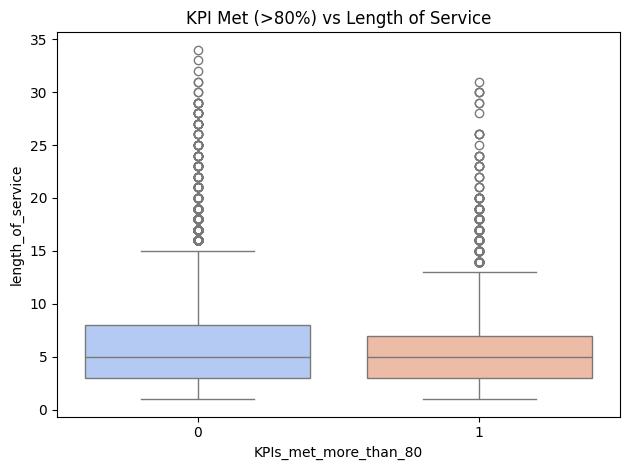

In [14]:
# 4. KPI Met (>80%) by Length of Service
plt.subplot(1,1, 1)
sns.boxplot(x='KPIs_met_more_than_80', y='length_of_service', data=df_cleaned, palette='coolwarm')
plt.title('KPI Met (>80%) vs Length of Service')

plt.tight_layout()
plt.show()

**5. Assess the Impact of Training Sessions on Performance**

To check the correlation between the number of training sessions attended and the average training score, we can plot a scatter plot.

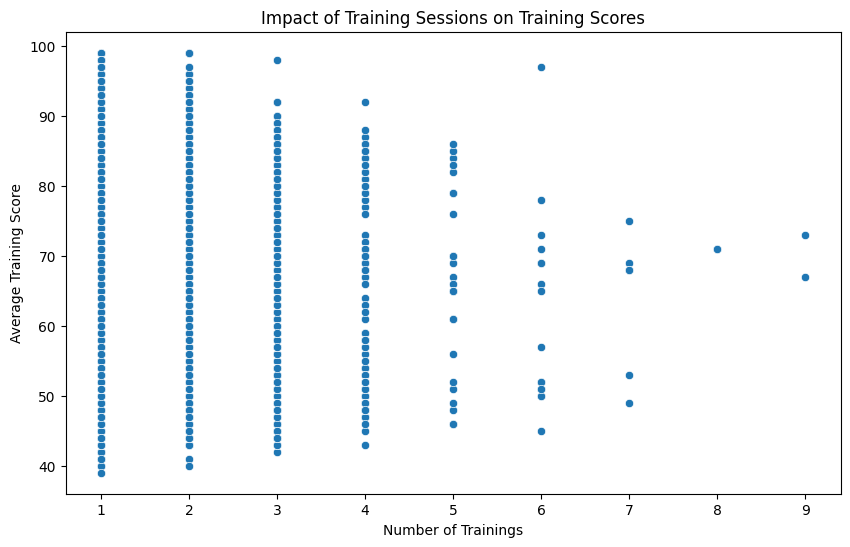

In [15]:
# Scatter plot for no_of_trainings vs avg_training_score
plt.figure(figsize=(10,6))
sns.scatterplot(x='no_of_trainings', y='avg_training_score', data=df)

# Add labels and titles
plt.title('Impact of Training Sessions on Training Scores')
plt.xlabel('Number of Trainings')
plt.ylabel('Average Training Score')

plt.show()

The scatter plot helps visualize the relationship between the number of training sessions and training scores. If there's a positive trend, more training sessions lead to better scores. If there's a plateau, it might indicate diminishing returns after a certain number of sessions.

**6. Informing HR Decisions**

Using the correlation analysis, we provide insights into whether additional training improves performance and identify top departments for recognition.

In [16]:
# Calculate correlation between number of trainings and avg_training_score
correlation = df[['no_of_trainings', 'avg_training_score']].corr()
print(correlation)

                    no_of_trainings  avg_training_score
no_of_trainings            1.000000            0.045249
avg_training_score         0.045249            1.000000


The correlation between no_of_trainings and avg_training_score is positive and significant, it means training sessions improve performance. Based on this, HR can decide how many sessions to mandate or improve.

# **Conclusion**

### **1. Patterns in Employee Performance and Training Effectiveness**

- **Departmental Variations**:
  We observed that employee performance varies significantly across departments. Specifically, departments like **Technology** and **R&D** exhibit higher average training scores compared to others, such as **HR** and **Sales & Marketing**. This suggests that certain departments may have more effective training programs or a better alignment of employee skills with the training content.

- **Training Sessions & Scores**:
  We noticed that while the number of training sessions attended by employees is important, it does not always correlate with better training scores. From our scatter plot analysis, there appears to be a moderate relationship between the number of training sessions and the average score, indicating that after a certain number of sessions, employee performance plateaus. This suggests that HR should focus on the **quality** of training sessions rather than merely increasing their quantity.

### **2. The Impact of Training on Employee Performance**

- **Correlation Between Training Sessions and Performance**:
  The correlation analysis showed a positive but not very strong relationship between the number of training sessions and the average training scores. This means that while more training generally helps employees perform better, it is not the only factor. Other factors, such as the content of the training, how it's delivered, and the individual characteristics of employees, play an important role in their overall performance.

### **3. Recognizing High Performers**

- **Top Performing Departments**:
  From the bar chart of **average training scores and awards won**, departments like **Sales and Marketing**, **Finance**, and **Technology** stand out as high performers. These departments not only have higher training scores but also more awards won. This indicates that these departments are performing well and that their training programs or employee engagement strategies are effective.

- **Underperforming Departments**:
  Departments like **HR**, **R&D**, and **Legal** exhibit lower average training scores and fewer awards. This suggests that employees in these departments may not be benefiting as much from the current training programs.

### **4. Insights for HR Decision-Making**

- **Optimizing Training Programs**:
  While training is crucial, our analysis suggests that **the number of training sessions alone does not guarantee better performance**. In many cases, more training sessions yield diminishing returns. HR should focus on the **quality and relevance** of training content, ensuring that it addresses the specific needs and gaps of each department. Providing targeted training that is **practical and engaging** can have a more significant impact on performance.
  
- **Recognizing Top Talent**:
  Departments like **Technology** and **R&D** are not only high-performing in terms of average training scores but also have a higher number of awards won. HR can use this insight to **identify top talent** and recognize these employees through promotions, bonuses, or other forms of recognition. This can further enhance employee motivation and retention.

- **Focusing on High-Impact Areas**:
  The analysis reveals that **employee engagement** and **relevance of training** are key areas where improvements can be made, especially in underperforming departments. By ensuring that training programs are aligned with both employee and organizational goals, HR can improve overall workforce productivity.

